# Gensim word vector visualization of various word vectors

* Gensim은 python에서 제공하는 word2vec 라이브러리
* 사실 딥러닝 패키지는 아니지만 효율적이고 확장가능하다는 장점으로 폭넓게 사용됨
* 단어 및 텍스트 유사성 모델링을 위한 패키지로, (LDA 스타일) Topic Model로 시작하여 SVD 및 neural 단어 표현으로 발전함.
    * Topic Modeling : 토픽 모델(Topic model)이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법. 한마디로 각 주제별로 단어 표현을 묶어줌.
    
    * LDA(Latent Dirichlet Allocation)
        * 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지를 서술하는 대한 확률적 토픽 모델 기법 중 하나이다. 미리 알고 있는 주제별 단어수 분포를 바탕으로, 주어진 문서에서 발견된 단어수 분포를 분석함으로써 해당 문서가 어떤 주제들을 함께 다루고 있을지를 예측할 수 있다. 
        * 단어의 교환성(exchangeability)을 가정한다.(BoW)
            - 교환성은 단어들의 순서는 상관하지 않고 오로지 단어들의 유무만을 근거로 한다. Apple is red와 Red is apple은 동일하다고 판단.
            - n-gram과 같이 사용하여 교환성을 확장시킬 수 있다.
            * 출처 : [위키피디아 LDA](https://ko.wikipedia.org/wiki/%EC%9E%A0%EC%9E%AC_%EB%94%94%EB%A6%AC%ED%81%B4%EB%A0%88_%ED%95%A0%EB%8B%B9)
            
    * SVD(Singular Value Decomposition 특이값 분해)
        -  A가 m x n 행렬일 때, 다음과 같이 3개의 행렬의 곱으로 분해(decomposition)하는 것을 말한다.
![svd formula](https://wikidocs.net/images/page/24949/%ED%8A%B9%EC%9D%B4%EA%B0%92%EB%B6%84%ED%95%B4.png)

![svd condition](https://wikidocs.net/images/page/24949/%ED%8A%B9%EC%9D%B4%EA%B0%92%EB%B6%84%ED%95%B41.png)
![image](https://wikidocs.net/images/page/24949/%ED%8A%B9%EC%9D%B4%EA%B0%92%EB%B6%84%ED%95%B42.png)
![image](https://wikidocs.net/images/page/24949/%ED%8A%B9%EC%9D%B4%EA%B0%92%EB%B6%84%ED%95%B43.png)
        - 전치 행렬(Transposed Matrix) : 주대각선을 축으로 반사대칭하여 얻은 행렬
![img](https://wikidocs.net/images/page/24949/%EC%A0%84%EC%B9%98.PNG)
        - 단위 행렬(Identity Matrix) : 주대각선의 원소가 모두 1이고 나머지는 모두 0인 행렬
![img](https://wikidocs.net/images/page/24949/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC.PNG)
        - 직교 행렬(Orthogonal Matrix) : 아래 두 조건을 만족하는 행렬 A
![img](https://wikidocs.net/images/page/24949/A%EC%99%80A%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC%EC%9D%98%EA%B3%B1.png)
![img](https://wikidocs.net/images/page/24949/A%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC%EA%B3%BCA%EC%9D%98%EA%B3%B1.png)
        - 대각 행렬(Diagonal Matrix) : 주대각선을 제외한 곳의 원소가 모두 0인 행렬
![img](https://wikidocs.net/images/page/24949/3x3%ED%96%89%EB%A0%AC.PNG)
![img](https://wikidocs.net/images/page/24949/mxn%ED%96%89%EB%A0%AC.png)

* Gensim 설치 명령어
    * conda install -c conda-forge gensim
    * pip install --upgrade gensim

In [5]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 데이터 다운로드하기
* [zip file 다운로드(822MB)](https://nlp.stanford.edu/data/glove.6B.zip)
* 이 실습시간에 사용하는 데이터는 GloVe vector로 되어 있어서 이를 워드투벡으로 바꿔서 사용할 예정이다.

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [3]:
# 본인 디렉토리 사용
# data path 설정 : 실행시 본인 디렉토리에 맞춰 설정해주세요!
glove_file = datapath('D:\\STUDY\\PYTHON\\workspace\\nlp\\inflearn_nlp\\glove.6B\\glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
# glove data를 word2vec형태로 변경한다.
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [22]:
word2vec_glove_file[:100]

'C:\\Users\\xkdld\\AppData\\Local\\Temp\\glove.6B.100d.word2vec.txt'

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

## KeyedVectors
* entity와 vector를 매핑해주고 각 entity는 string id에 의해 식별된다.
    * str_id => 1D numpy array
* entity는 보통 단어에 대응되지만 document, graph node 등에도 대응될 수 있다.
* 서로 다른 use-cases를 일반화하기 위해 이 모듈은 키(key)를 entity라고 부른다.

![comparison](https://smartstuartkim.files.wordpress.com/2019/03/keyedvectorsvsfullmodel.png)

### function 1 : most_similar(target)
* positive(default)=target : target과 가장 유사한 정도를 보이는 10가지 반환
* negative=target : target과 가장 유사도가 떨어지는 상위 10가지 반환

In [5]:
model.most_similar('obama')

C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('barack', 0.9372166395187378),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875632882118225),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933661937713623),
 ('dole', 0.7851963043212891),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [24]:
model.most_similar(positive='banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [25]:
# 바나나와 가장 다른 것들 반환
model.most_similar(negative='banana')

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.706771969795227),
 ('zety', 0.7056614756584167),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202343940735),
 ('ryryryryryry', 0.6905654668807983),
 ('maurilio', 0.6865652799606323)]

In [8]:
# woman, king과는 가깝고 man과는 먼 것 하나 출력해보기 => queen
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [26]:
def analogy(far, close1, close2):
    result = model.most_similar(positive=[close1, close2], negative=[far])
    return result[0][0]

In [27]:
# japan(국가)과는 멀고 japanese(언어,사람), australia(국가)와는 가까운 것 출력
analogy('japan', 'japanese', 'australia')

'australian'

In [11]:
analogy('australia', 'beer', 'france')

'champagne'

In [12]:
# 오바마와는 멀고 클린턴, 레이건과는 가까운 것 출력! => 닉슨
analogy('obama', 'clinton', 'reagan')

'nixon'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'terrible'

### function 2 : doesnt_match(list of str or int)
* 주어진 리스트에서 다른 것들과 유사하지 않은 것을 반환(str or int)

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [29]:
a = [1,2,3,4,0]
c = [5,3,6,2,7]
b = [c[i] for i in a]
b

[3, 6, 2, 7, 5]

In [16]:
# 단어를 2차원으로 나타냄. 
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])
    # PCA를 사용해서 2차원으로 차원축소 
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    #               x,        y
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        # 해당 단어 우상에 넣기
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


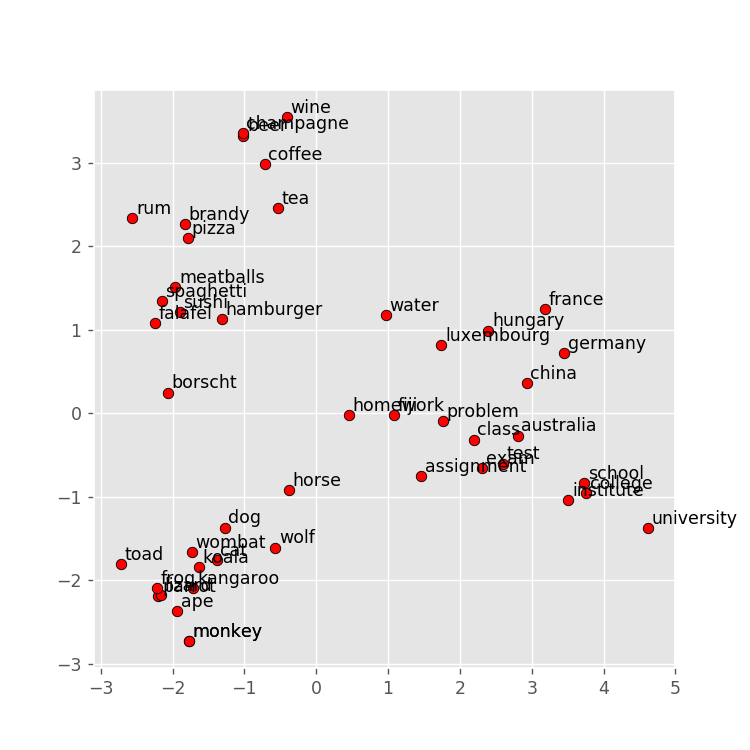

In [17]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


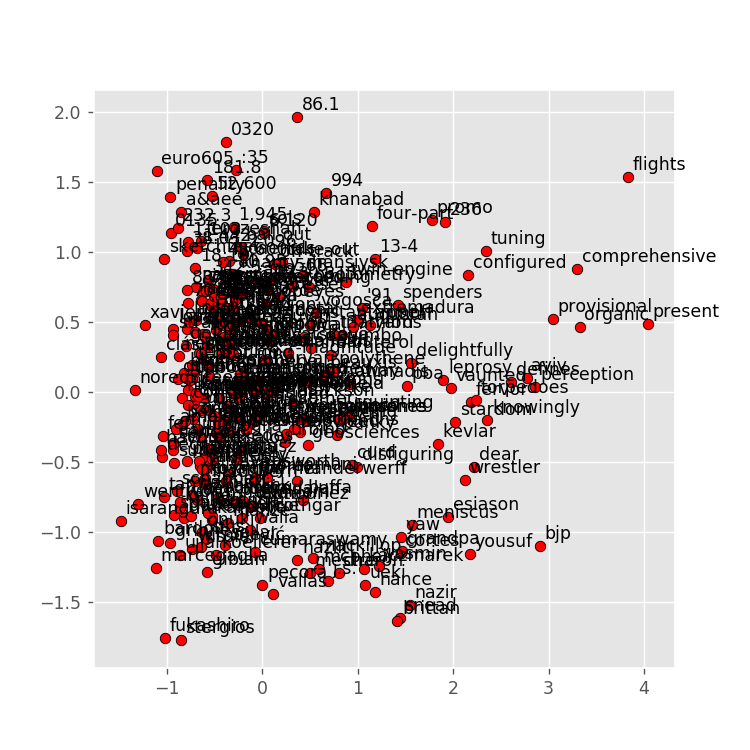

In [18]:
display_pca_scatterplot(model, sample=300)


# Gensim for 한글 데이터셋

### 네이버 영화 리뷰(Naver sentiment movie corpus v1.0)
* 출처 : [https://github.com/e9t/nsmc](https://github.com/e9t/nsmc)
* 영화당 100개의 140자 이내 평가(리뷰)
* 총 20만개 리뷰(수집된 64만개 중 샘플링한 결과)
    * ratings_train.txt : 15만
    * ratings_test.txt : 5만
    * 긍정(1)/부정(0) 리뷰의 비율을 동일하게 샘플링(무작위 추정값 0.5)
    * 중립 리뷰는 제외함
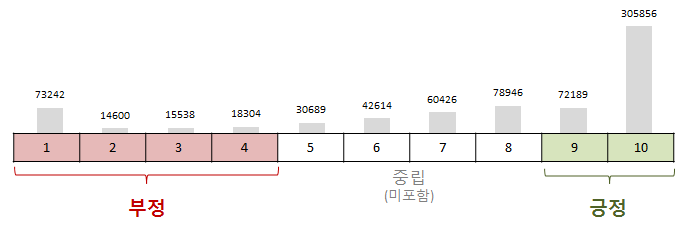

In [56]:
# 한글 폰트
from matplotlib import font_manager, rc
# 본인 로컬에 있는 폰트 지정해주세요. 저는 한초롬돋움으로 지정
font_fname = 'C:/Windows/Fonts/HANDotum.ttf'     
font_name = font_manager.FontProperties(fname=font_fname).get_name()
# plt 전체 폰트 변경
plt.rcParams["font.family"] = font_name

In [11]:
import pandas as pd
#  텍스트 파일 디렉토리에 맞게 지정해주세요!
train = pd.read_csv("../data/naver_review/ratings_train.txt",
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv("../data/naver_review/ratings_test.txt",
                    header=0, delimiter='\t', quoting=3)

In [12]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

train shape :  (150000, 3)
test shape :  (50000, 3)


In [13]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [34]:
test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [16]:
from konlpy.tag import Okt
pos_tagger = Okt()
from bs4 import BeautifulSoup
import re

In [17]:
def input_to_wordlist(input,norm=True, stem=True):
    # 특수문자 공백으로 
    input_text = re.sub('[^a-zA-Z가-힣]',' ',input)
    # 영문자는 소문자로 변환하고 split
    input_text = input_text.lower()
    return [t[0] for t in pos_tagger.pos(input_text.strip(),norm=norm,stem=stem)]

In [18]:
def input_to_sentences(input,norm=True, stem=True):
    sentences = []
    for raw in input:
        sentences.append(input_to_wordlist(raw))
    return sentences

In [78]:
input_to_wordlist(train['document'][0])

['아', '더빙', '진짜', '짜증나다', '목소리']

In [20]:
input_to_sentences(train['document'][:2])

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다']]

In [21]:
%time train_sentences = input_to_sentences(train['document'])

Wall time: 11min 48s


In [22]:
%time test_sentences = input_to_sentences(test['document'])

Wall time: 4min 21s


In [23]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

### Word2Vec 모델의 파라메터

* 아키텍처 : 아키텍처 옵션은 skip-gram (default) 또는  CBOW 모델이다. skip-gram (default)은 느리지 만 더 나은 결과를 낸다.

* 학습 알고리즘 : Hierarchical softmax (default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.

* downsampling 빈번하게 등장하는 단어에 대한 다운 샘플링 : Google 문서는 .00001에서 .001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.

* num_feauters 단어 벡터 차원 : 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 더 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.

* context 컨텍스트 / 창 크기 : 학습 알고리즘이 고려해야하는 컨텍스트의 단어 수는 얼마나 될까? hierarchical softmax 를 위해 좀 더 큰 수가 좋지만 10 정도가 적당하다. 

* Worker threads : 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4에서 6 사이의 값을 사용하다.

* min_word_count 최소 단어 수 : 어휘의 크기를 의미있는 단어로 제한하는 데 도움이 된다. 모든 문서에서이 여러 번 발생하지 않는 단어는 무시된다. 10에서 100 사이가 적당하며, 이 경진대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하기 위해 최소 단어 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000 단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다

In [25]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 단어 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample
# 빈번하게 등장하는 단어에 대한 다운 샘플링

# 초기화 및 모델 학습
from gensim.models import word2vec

model2 = word2vec.Word2Vec(train_sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model2

2019-03-12 16:18:13,776 : INFO : collecting all words and their counts
2019-03-12 16:18:13,779 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-03-12 16:18:13,830 : INFO : PROGRESS: at sentence #10000, processed 129463 words, keeping 12339 word types
2019-03-12 16:18:13,922 : INFO : PROGRESS: at sentence #20000, processed 255448 words, keeping 17390 word types
2019-03-12 16:18:13,997 : INFO : PROGRESS: at sentence #30000, processed 383857 words, keeping 21091 word types
2019-03-12 16:18:14,075 : INFO : PROGRESS: at sentence #40000, processed 513600 words, keeping 24289 word types
2019-03-12 16:18:14,121 : INFO : PROGRESS: at sentence #50000, processed 640241 words, keeping 26929 word types
2019-03-12 16:18:14,215 : INFO : PROGRESS: at sentence #60000, processed 766665 words, keeping 29188 word types
2019-03-12 16:18:14,271 : INFO : PROGRESS: at sentence #70000, processed 891634 words, keeping 31325 word types
2019-03-12 16:18:14,353 : INFO : PROGRESS: at 

In [27]:
# 학습이 완료되면 필요없는 메모리를 unload시킨다
model2.init_sims(replace=True)

# model 이름 지정
model_name = 'gensim_300features_naver_review'
model2.save(model_name)

2019-03-12 16:21:30,312 : INFO : precomputing L2-norms of word weight vectors
2019-03-12 16:21:30,378 : INFO : saving Word2Vec object under gensim_300features_naver_review, separately None
2019-03-12 16:21:30,380 : INFO : not storing attribute vectors_norm
2019-03-12 16:21:30,385 : INFO : not storing attribute cum_table
2019-03-12 16:21:31,473 : INFO : saved gensim_300features_naver_review


In [28]:
# most_similar()
model2.most_similar("왕")

C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('끝판', 0.7965130805969238),
 ('조니뎁', 0.7077058553695679),
 ('제이슨', 0.687842071056366),
 ('콜린', 0.6805658936500549),
 ('트', 0.6766747832298279),
 ('케빈', 0.6723334193229675),
 ('잭', 0.6687645316123962),
 ('퍼스', 0.6684366464614868),
 ('마녀', 0.6663633584976196),
 ('형사', 0.6550601124763489)]

In [29]:
model2.doesnt_match('하정우 차태현 김구라 전지현'.split())
# 배우와 배우가 아닌자

C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'김구라'

## 벡터화한 단어를 t-SNE를 통해 시각화 

In [26]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

#### 이전에 저장해둔 모델을 이름을 통해 로드할 수 있다!

In [36]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'gensim_300features_naver_review'
model3 = g.Doc2Vec.load(model_name)

vocab = list(model3.wv.vocab)
X = model3[vocab]
vocab[:10]

2019-03-12 16:28:35,477 : INFO : loading Doc2Vec object from gensim_300features_naver_review
2019-03-12 16:28:35,685 : INFO : loading wv recursively from gensim_300features_naver_review.wv.* with mmap=None
2019-03-12 16:28:35,692 : INFO : setting ignored attribute vectors_norm to None
2019-03-12 16:28:35,699 : INFO : loading vocabulary recursively from gensim_300features_naver_review.vocabulary.* with mmap=None
2019-03-12 16:28:35,706 : INFO : loading trainables recursively from gensim_300features_naver_review.trainables.* with mmap=None
2019-03-12 16:28:35,712 : INFO : setting ignored attribute cum_table to None
2019-03-12 16:28:35,715 : INFO : loaded gensim_300features_naver_review
C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


['아', '더빙', '진짜', '짜증나다', '목소리', '흠', '포스터', '보고', '초딩', '영화']

In [37]:
print("feature 개수 : ",len(X))
# 첫번째 데이터에서 10개만 찍어보면
print("첫번째 데이터에서 10개 : \n",X[0][:10])

feature 개수 :  3686
첫번째 데이터에서 10개 : 
 [ 0.04318366 -0.04671348 -0.02343874  0.04642284  0.06633574 -0.00256446
 -0.04142153  0.03470408 -0.00672754  0.02727191]


### t-SNE
(출처 : [https://bcho.tistory.com/1210](https://bcho.tistory.com/1210))

#### 기존 PCA 기반 차원축소의 문제점
* PCA의 경우 선형 분석 방식으로 값을 사상하기 때문에 차원이 감소되면서 군집화되어 있는 데이터들이 뭉게져서 제대로 구별할 수 없는 문제를 가지고 있다.
![pca](https://t1.daumcdn.net/cfile/tistory/9987A5335A0C494001)

### t-SNE는 이 문제를 해결하기 위한 차원축소 방법
![tsne](https://t1.daumcdn.net/cfile/tistory/996615335A0C494027)

* 일단 점을 하나 선택한다.(여기선 검정색 점)
* 검정점을 기준점으로 T분포 상 가운데 위치한다면, 기준점으로부터 상대점까지의 거리에 있는 T분포의 값을 선택하여, 이 값을 Similarity로 하고 similarity가 가까운 값끼리 묶는다.
* 뭉쳐있어도 군집이 중복되지 않는다는 장점
* 매번 계산할때마다 축의 위치가 바뀌어서 다른 모양으로 나타나는 단점 지님
* 단, 데이터의 군집성과 같은 특성들은 유지되어서 시각화를 통한 데이터분석에 유용

In [41]:
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화 진행함
X_tsne = tsne.fit_transform(X[:100,:])
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x','y'])
df.shape

(100, 2)

In [42]:
df.head(10)

,x,y
아,-7.026756,-4.985224
더빙,-2.276130,-5.322141
진짜,-5.773090,1.312279
짜증나다,-4.488659,-4.935988
목소리,-2.750875,-3.921483
흠,-2.303312,-8.060687
포스터,-3.259202,-7.414798
보고,-6.415696,-0.639502
초딩,-8.211153,-3.143432
영화,-3.603840,4.719241


<IPython.core.display.Javascript object>


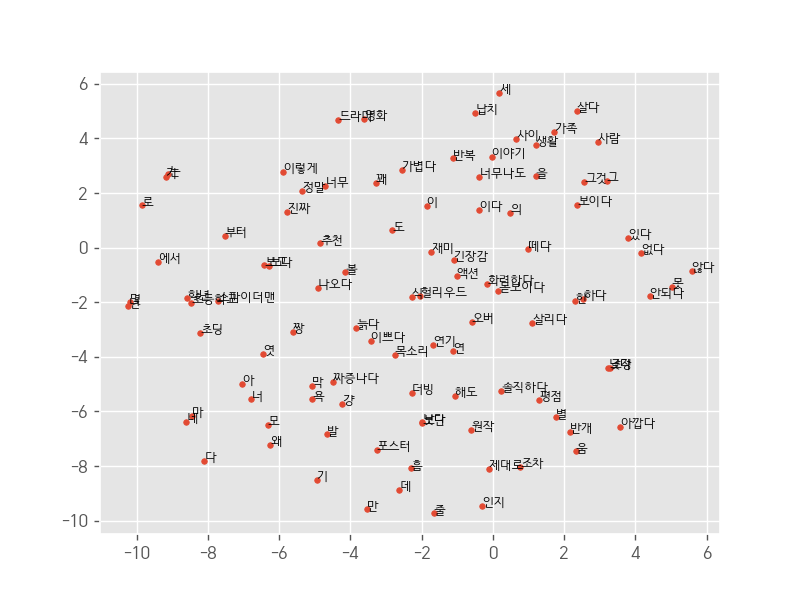

In [62]:
fig = plt.figure()
# fig.set_size_inches(40,20)
ax = fig.add_subplot(1,1,1)

ax.scatter(df['x'], df['y'],s=10)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=7)
plt.show()

In [81]:
import numpy as np

# 각 문장별로 단어 벡터의 평균을 구하는 함수
def makeFeatureVec(words, model, num_features):
    # 속도를 위해 0으로 채운 배열로 초기화
    featureVec = np.zeros((num_features,), dtype="float32")
    
    nwords = 0.
    
    # Index2Word는 모델의 사전에 있는 단어명을 담은 리스트
    # 속도를 위해 set 형태로 초기화
    index2word_set = set(model.wv.index2word)
    
    # loop를 돌며 모델 사전에 포함되어 있는 단어라면 featureVec에 추가한다
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            # model[word]는 해당 단어의 모든 점수 배열
            featureVec = np.add(featureVec, model[word])
    
    # 단어수로 나누어 평균을 구한다
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [82]:
# 단어 목록의 각각에 대한 평균 feature vector를 계산하고 2D numpy array를 반환
def getAvgFeatureVecs(docs, model, num_features):
    cnt = 0.
    featureVecs = np.zeros( (len(docs), num_features), dtype="float32")
    
    size = len(docs)
    for review in docs:
        # 매 만개씩 상태를 출력
        if cnt%10000. == 0:
            print("진행상황 %d of %d" %(cnt, size))
        # 벡터별 평균을 삽입해준다
        featureVecs[int(cnt)] = makeFeatureVec(review, model, num_features)
        cnt +=1.
    return featureVecs

In [89]:
%time trainDataVecs = getAvgFeatureVecs(train_sentences, model3, num_features)

진행상황 0 of 150000


C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


진행상황 10000 of 150000
진행상황 20000 of 150000
진행상황 30000 of 150000
진행상황 40000 of 150000
진행상황 50000 of 150000
진행상황 60000 of 150000
진행상황 70000 of 150000
진행상황 80000 of 150000
진행상황 90000 of 150000
진행상황 100000 of 150000
진행상황 110000 of 150000
진행상황 120000 of 150000
진행상황 130000 of 150000
진행상황 140000 of 150000
Wall time: 1min 10s


In [90]:
%time testDataVecs = getAvgFeatureVecs(test_sentences, model3, num_features)

진행상황 0 of 50000


C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\xkdld\Anaconda3\envs\learnGoogle\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


진행상황 10000 of 50000
진행상황 20000 of 50000
진행상황 30000 of 50000
진행상황 40000 of 50000
Wall time: 21.4 s


In [91]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs=-1, random_state=2019)

In [99]:
trainDataVecs = np.nan_to_num(trainDataVecs)
testDataVecs = np.nan_to_num(testDataVecs)

In [100]:
%time forest = forest.fit(trainDataVecs, train["label"])

Wall time: 8min 7s


In [101]:
from sklearn.model_selection import cross_val_score
# cross_val_score(estimator)  cross validation을 이용해서 점수를 평가
%time score = np.mean(cross_val_score(forest, trainDataVecs,\
                      train['label'], cv =10, scoring='roc_auc'))

Wall time: 2h 5min 33s


In [102]:
score

0.8938216806762899

In [103]:
# test dataset을 예측한 결과
testPrediction = forest.predict( testDataVecs )
testPrediction[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [104]:
test['label'][:10]

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: label, dtype: int64

In [106]:
from sklearn.metrics import accuracy_score
testAcc = accuracy_score(test['label'], testPrediction)
testAcc

0.80676

## References
* [https://www.lucypark.kr/docs/2015-pyconkr/#36](https://www.lucypark.kr/docs/2015-pyconkr/#36)
* [https://radimrehurek.com/gensim/tutorial.html](https://radimrehurek.com/gensim/tutorial.html)
* [https://bcho.tistory.com/1210](https://bcho.tistory.com/1210)
* [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)